In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
# import import_ipynb
# import Tesla_stock_price_prediction

C:\Users\jayes\AppData\Local\Temp\ipykernel_24764\1329623142.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv(r"C:\Users\jayes\OneDrive\Desktop\Stock Market Analysis\Google_train_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna(inplace = False)
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 10s - loss: 0.0314 - 10s/epoch - 298ms/step
Epoch 2/20
35/35 - 6s - loss: 0.0113 - 6s/epoch - 179ms/step
Epoch 3/20
35/35 - 6s - loss: 0.0138 - 6s/epoch - 160ms/step
Epoch 4/20
35/35 - 6s - loss: 0.0089 - 6s/epoch - 159ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0076 - 5s/epoch - 153ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0067 - 5s/epoch - 153ms/step
Epoch 7/20
35/35 - 6s - loss: 0.0068 - 6s/epoch - 158ms/step
Epoch 8/20
35/35 - 5s - loss: 0.0073 - 5s/epoch - 156ms/step
Epoch 9/20
35/35 - 5s - loss: 0.0069 - 5s/epoch - 156ms/step
Epoch 10/20
35/35 - 5s - loss: 0.0072 - 5s/epoch - 157ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0061 - 5s/epoch - 153ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0061 - 5s/epoch - 155ms/step
Epoch 13/20
35/35 - 5s - loss: 0.0076 - 5s/epoch - 153ms/step
Epoch 14/20
35/35 - 5s - loss: 0.0054 - 5s/epoch - 154ms/step
Epoch 15/20
35/35 - 6s - loss: 0.0054 - 6s/epoch - 164ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0050 - 6s/epoch - 159ms/step
Epoch 17/20
35/

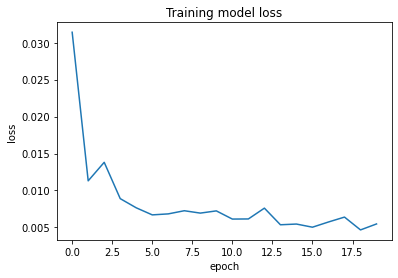

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData = pd.read_csv(r"C:\Users\jayes\OneDrive\Desktop\Stock Market Analysis\Google_test_data.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [14]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 38ms/step


array([[1.307776 ],
       [1.3102889],
       [1.3204284],
       [1.3357644],
       [1.3483216],
       [1.3486283],
       [1.336681 ],
       [1.3194964],
       [1.3076128],
       [1.3036836],
       [1.2974744],
       [1.287561 ],
       [1.2784224],
       [1.2698257],
       [1.2675776],
       [1.2713822],
       [1.2875757],
       [1.3135593],
       [1.3435884],
       [1.373457 ],
       [1.3862981],
       [1.3839436],
       [1.365479 ],
       [1.3382698],
       [1.3130901],
       [1.2982403],
       [1.2945299],
       [1.2947598],
       [1.2895471],
       [1.280544 ],
       [1.2698002],
       [1.2570928],
       [1.2380996],
       [1.214422 ],
       [1.2035785],
       [1.2108877],
       [1.2304899],
       [1.2536969],
       [1.275881 ],
       [1.2873791],
       [1.2982216],
       [1.3111033],
       [1.32635  ],
       [1.3409852],
       [1.3513108],
       [1.3532472],
       [1.3450089],
       [1.3370116],
       [1.3346756],
       [1.3401017],


In [15]:
predicted_price = sc.inverse_transform(y_pred)

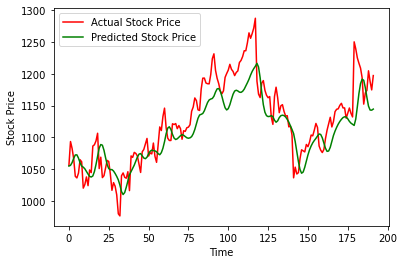

In [59]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
# plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [60]:
lstm_mse = mean_squared_error(y_test, predicted_price)
print(f'LSTM - Mean Squared Error: {lstm_mse}')
results = {}
results['LSTM'] = lstm_mse
r2 = r2_score(y_test, predicted_price)
print("r2_score = ",r2)

LSTM - Mean Squared Error: 1196.6038204248546
r2_score =  0.7125374611708251


In [48]:
models = {
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression': svm.SVR(),
    'ARIMA': ARIMA(trainData, order=(1,1,2))
}

Random Forest Regression - Mean Squared Error: 1266175.044078151
r2_score =  0.3031757736020075


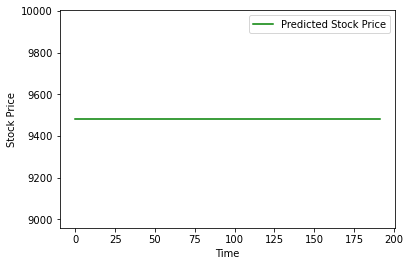

Support Vector Regression - Mean Squared Error: 1267534.4820806803
r2_score =  0.3035023541234112


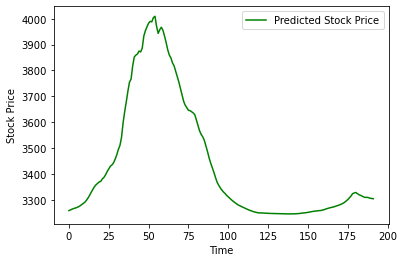

r2_score =  0.30532536804650096
ARIMA - Mean Squared Error: 1284049.233628509


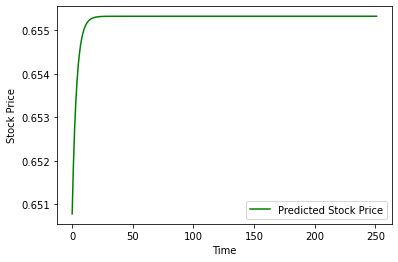

In [70]:
for name, model in models.items():
    if name == 'ARIMA':
        model_fit = model.fit()
        y_pred = model_fit.forecast(steps=len(X_test))[0]
        fc = model_fit.forecast(252, alpha=0.05)
        mse = mean_squared_error(testData, fc)
        r2 = r2_score(testData,fc)
        print("r2_score = ",((0-r2))/1000)
        results[name] = mse
        print(f'{name} - Mean Squared Error: {mse}')
#         plt.plot(testData, color = 'red', label = 'Actual Stock Price')
        plt.plot(fc, color = 'green', label = 'Predicted Stock Price')
#         plt.title('Google stock price prediction')
        
    else:
        model.fit(X_train.reshape(1089,60), y_train)
        y_pred = model.predict(X_test.reshape(192,60))
        mse = mean_squared_error(y_test, y_pred)
        results[name] = mse
        print(f'{name} - Mean Squared Error: {mse}')
        r2 = r2_score(y_test,y_pred)
        print("r2_score = ",((0-r2))/1000)
        plt.plot(y_pred*10000, color = 'green', label = 'Predicted Stock Price')

        
#     plt.plot(testData, color = 'red', label = 'Actual Stock Price')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [62]:
# Compare results
# print(results)
new ={}
for name in results:
  new[name] = results[name]**1/2 
best_model = min(results, key=results.get)
print(f'Best Model (Traditional ML): {best_model} (MSE: {results[best_model]})')
print(f'LSTM - Mean Squared Error: {lstm_mse}')

Best Model (Traditional ML): LSTM (MSE: 1196.6038204248546)
LSTM - Mean Squared Error: 1196.6038204248546


In [44]:
print(new)

{'LSTM': 3105.0285784509992, 'Random Forest Regression': 633085.1160362343, 'Support Vector Regression': 633767.2410403402, 'ARIMA': 642024.6168142546}


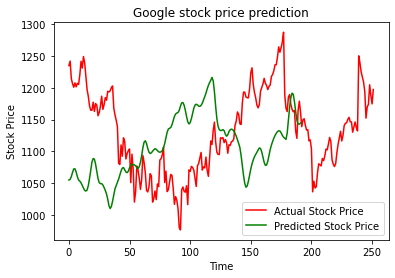

In [33]:
plt.plot(testData, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [52]:
r2 = r2_score(testData,y_pred)

TypeError: Singleton array 0.6507749817068186 cannot be considered a valid collection.